In [1]:
!pip install ipympl
%matplotlib widget

In [2]:
from connections import * 
from auxilary import tiffVisualize
import tifffile

In [3]:
exp_path = r"f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20"
#volume = modeExtract(exp_path, mode="skeletonize")
volume = exp_path + "\downsampled_standard_binned_tiffs\combined_top_5_skeletonize.tif"
print(volume)

f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\downsampled_standard_binned_tiffs\combined_top_5_skeletonize.tif


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gangliagurdian\AppData\Local\Temp\ipykernel_59504\2012510408.py:3: SyntaxWarning: invalid escape sequence '\d'
  volume = exp_path + "\downsampled_standard_binned_tiffs\combined_top_5_skeletonize.tif"


Cleaning previous run: Removing f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters
Loading TIFF: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\downsampled_standard_binned_tiffs\combined_top_5_skeletonize.tif
Processing 18108 points with DBSCAN (eps=3, min_samples=10)...
Found 78 unique clusters.
Mapping 78 clusters to vibrant RGB colors...
Saved combined RGB labeled stack: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_combined_labels_rgb.tif
Saving individual cluster stacks (Min points required: 50)...
Successfully saved 9 cluster files.
Skipped 69 clusters because they had fewer than 50 points.


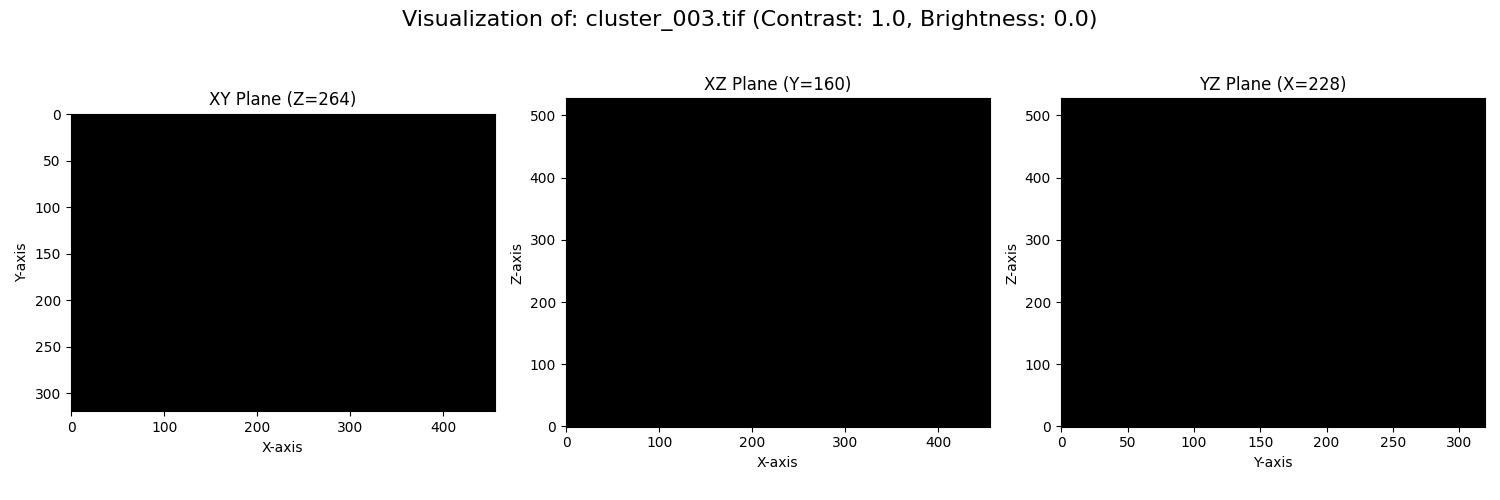

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_003.tif'.


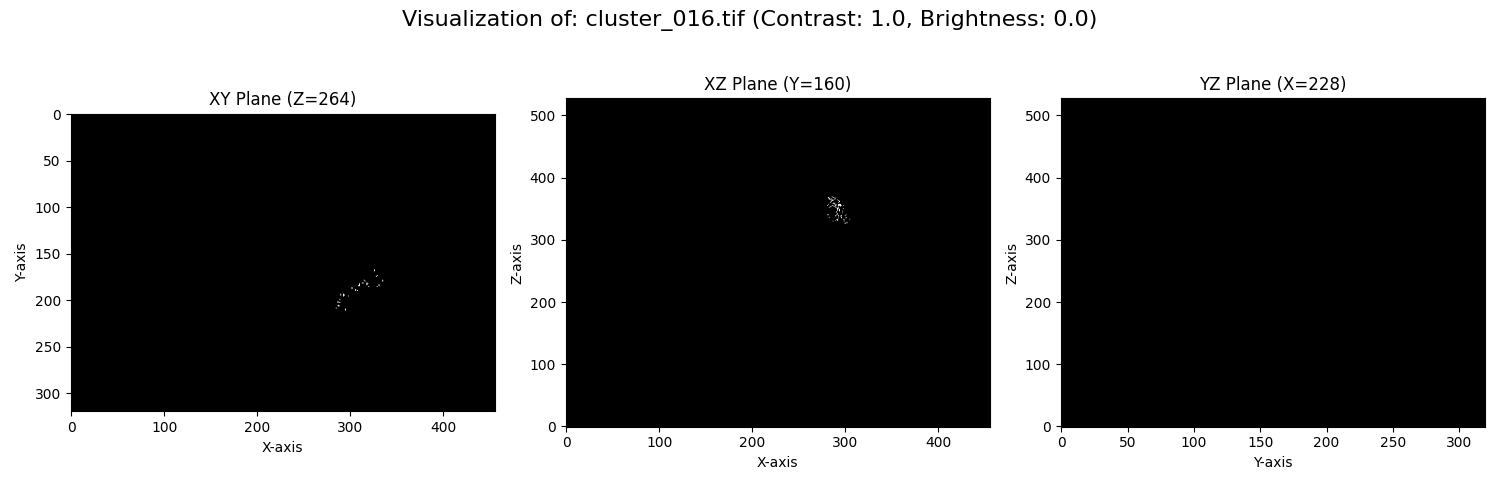

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_016.tif'.


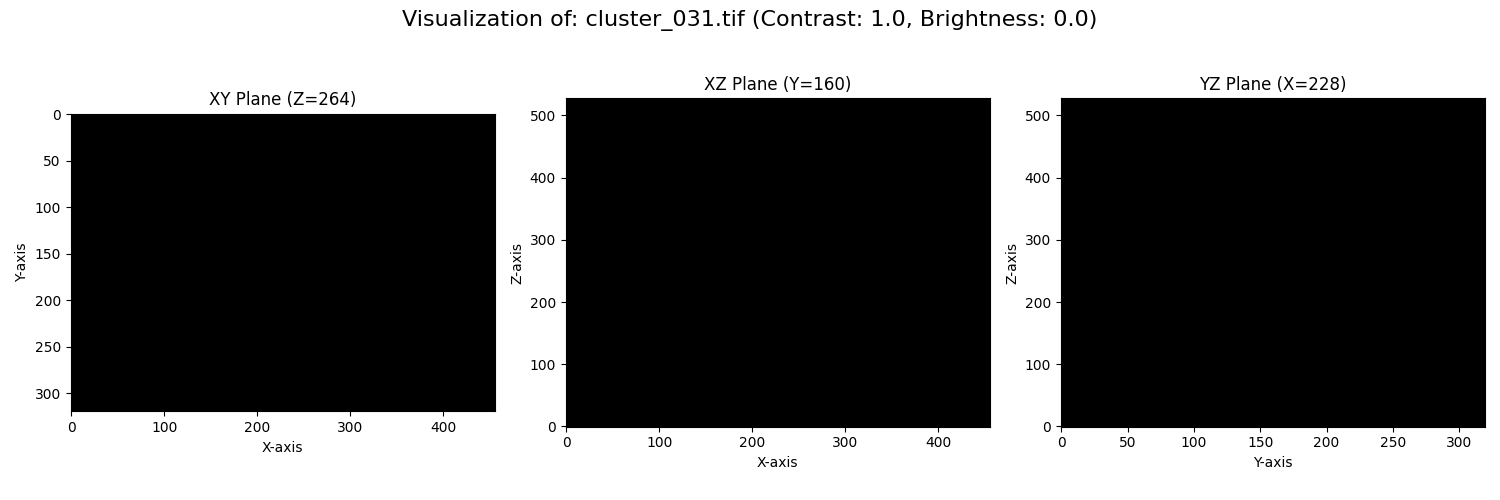

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_031.tif'.


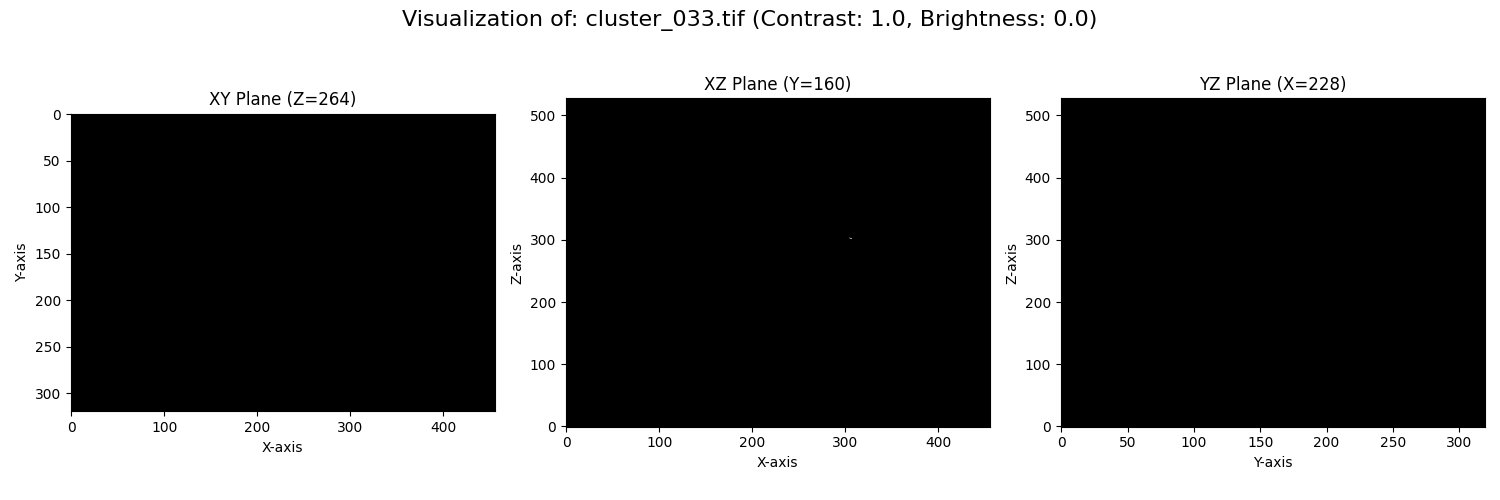

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_033.tif'.


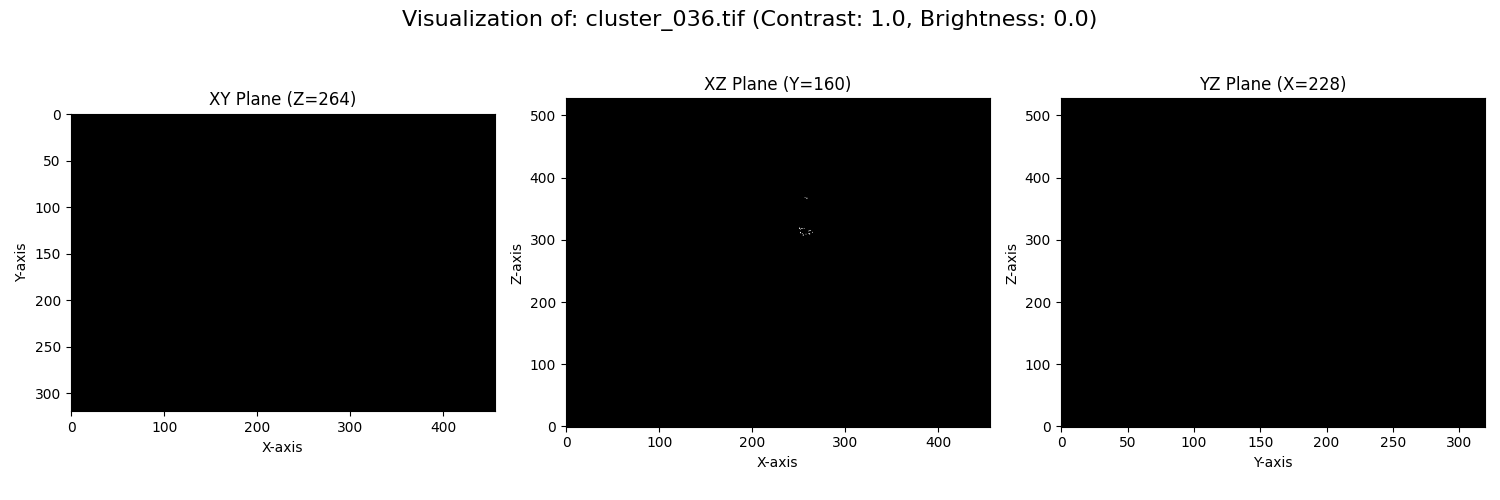

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_036.tif'.


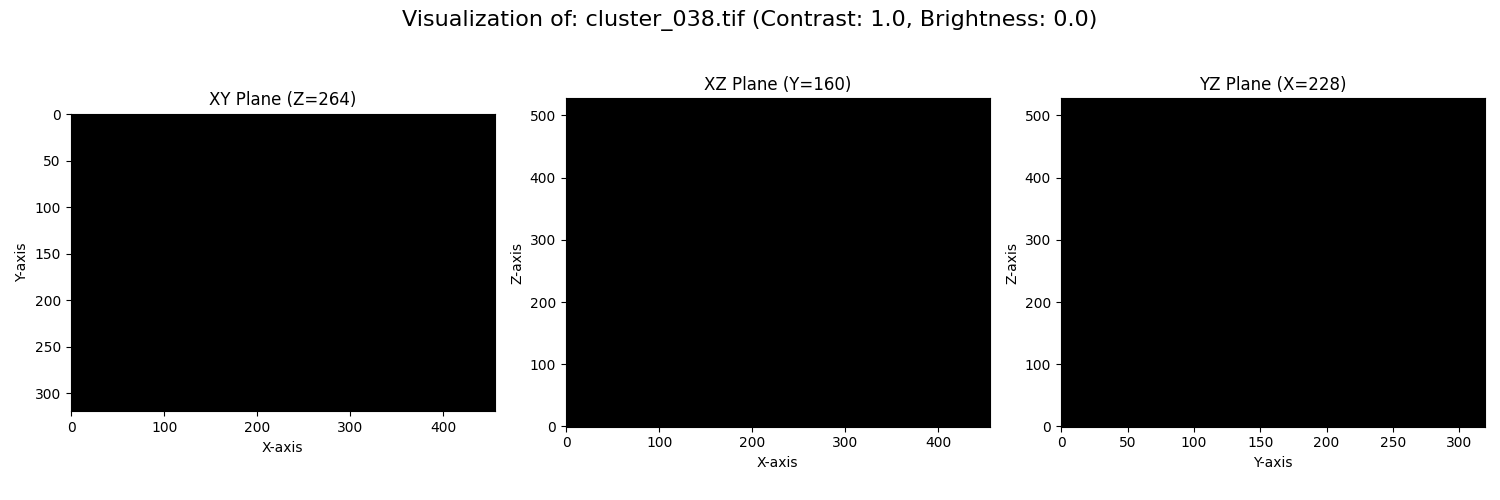

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_038.tif'.


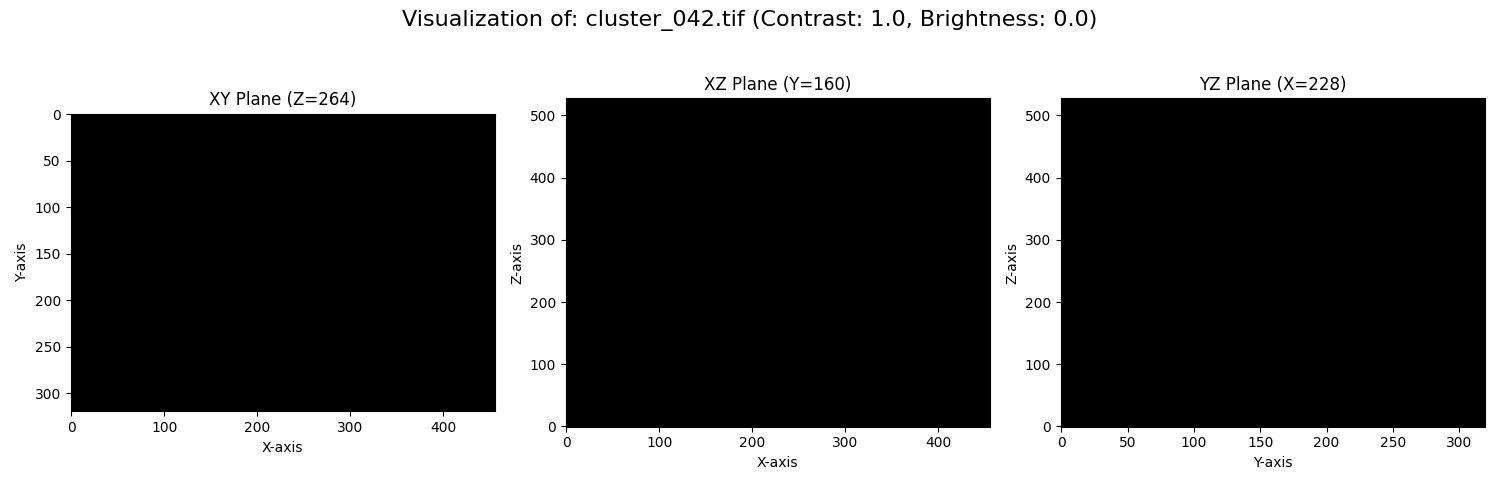

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_042.tif'.


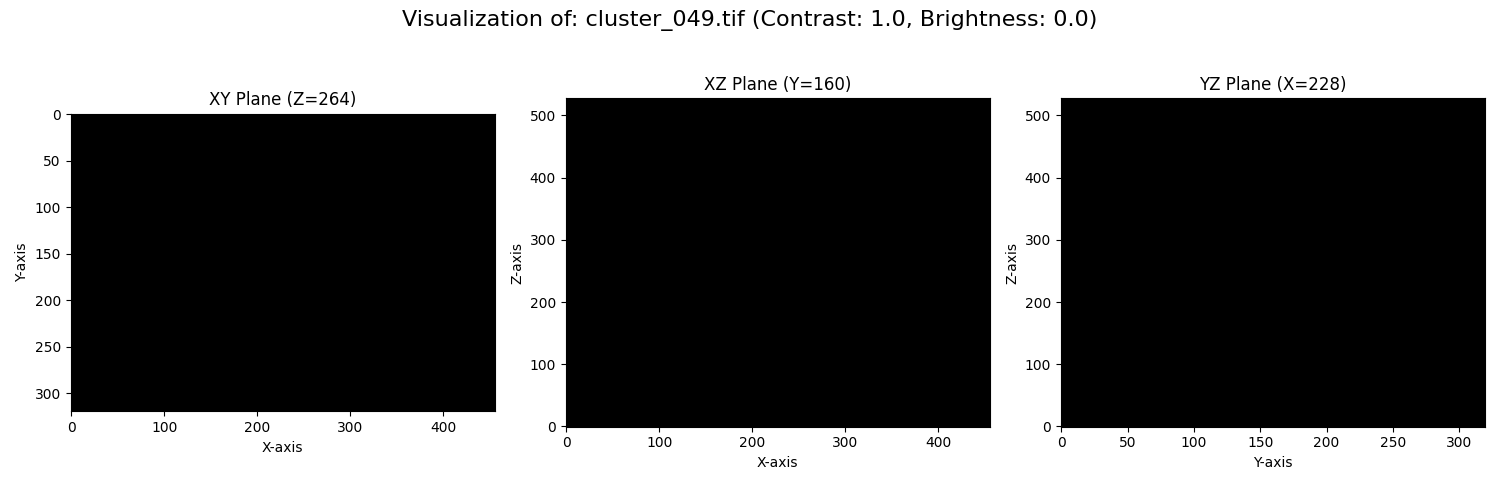

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_049.tif'.


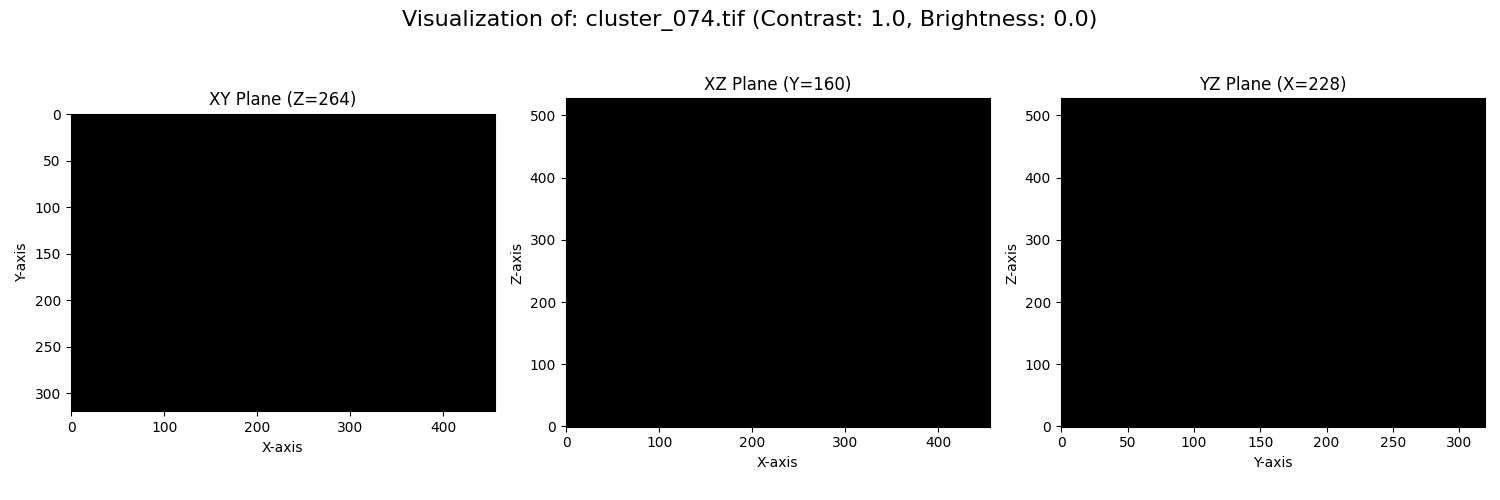

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_074.tif'.


In [4]:
dbscan_stacks = dbscan(
    input_tiff_path=volume,
    output_dir=exp_path,
    eps=3,
    min_samples=10
)
for i, stack in enumerate(dbscan_stacks):
    tiffVisualize(dbscan_stacks[i], colormap="bone", views=3)



In [5]:
print(dbscan_stacks)

['f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_003.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_016.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_031.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_033.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_036.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_038.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clusters\\cluster_042.tif', 'f:\\axonAtlas2\\experiments\\UTSW_brain8_reg_optim_2025-11-11_12-39-20\\combined_top_5_skeletonize_clu

In [6]:
#output_path = os.path.join(exp_path, "connections_dbscan.tif")
#con_stack = connections(dbscan_stacks[16], exp_path)

# Create a specific output folder so files don't get lost
output_dir = os.path.join(exp_path, "dbscan_results")
os.makedirs(output_dir, exist_ok=True)

for i in range(len(dbscan_stacks)):
    # Fix: Pass 'filename_prefix' so files don't overwrite each other!
    # When calling on a single array:
# The function now returns 3 things: (stack, tif_path, csv_path)
# We use _ to ignore the paths if you only want the stack for combination
    current_con, _, _ = connections(dbscan_stacks[i], output_dir=output_dir, filename_prefix=f"cluster_{i:02d}")
    
    print(f"Processed cluster {i}")

Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_003.tif
Processed cluster 0
Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_016.tif
Processed cluster 1
Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_031.tif
Processed cluster 2
Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_033.tif
Processed cluster 3
Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_036.tif
Processed cluster 4
Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain8_reg_optim_2025-11-11_12-39-20\combined_top_5_skeletonize_clusters\cluster_038.tif
Processed cluster 5
Loading TI